In [4]:
from sklearn.datasets import fetch_openml
import torch

mnist = fetch_openml('mnist_784', as_frame=False)
device = 'cuda' if torch.cuda.is_available() else 'cpu'
X = torch.from_numpy(mnist.data).float().to(device)
Y = torch.from_numpy(mnist.target.astype(int)).to(device)

TypeError: len() of a 0-d tensor

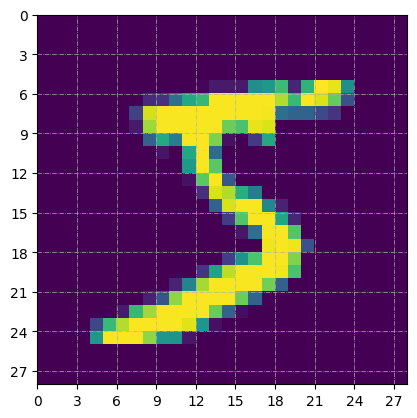

In [40]:
import matplotlib.pyplot as plt
import numpy as np

def show_image(img):
    plt.imshow(img, extent=[0, img.shape[1], img.shape[0], 0])
    plt.xticks(np.arange(0, img.shape[1]+1, 3))
    plt.yticks(np.arange(0, img.shape[0]+1, 3))
    plt.grid(True, which="both", linestyle='-.', linewidth=0.5)

def convolution(img, kernel):
    mat = []
    for i in range(len(img) - 2):
        row = []
        for j in range(len(img[0]) - 2):
            row.append(img[i : i + 3, j : j + 3] @ kernel)
        mat.append(row)
    return torch.tensor(mat)

img = X[0]
kernel = torch.randn((3, 3), device=device)
show_image(img.view(28, 28).cpu())
img = convolution(img, kernel)